#SIP

In [1]:
import os
import pandas as pd

# Only needed in Google Colab: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the base directory where your 3 folders are located.
# Change 'YourFolderPath' to the actual folder path in your Google Drive.
base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/SIP/'

# The names of the folders containing the files.
folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    """
    Given a filename like:
      s=VOO+mp=False+sd=2016-01-1+...+ta=0.8504619002342224
    this function returns a dictionary mapping keys to values.
    """
    # Remove file extension if present (e.g. .txt, .csv)
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

# Dictionary to hold test accuracy by folder and ticker.
results = {folder: {} for folder in folders}

# Loop over each folder and file.
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    folder_path = os.path.join(folder_path, '2.15')
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path):
            params = parse_filename(file)
            # Only process files that include both the ticker ('s') and test accuracy ('ta').
            if 's' in params and 'ta' in params:
                ticker = params['s']
                test_accuracy = round(float(params['ta']), 3)
                results[folder][ticker] = test_accuracy

# Get a sorted list of all tickers found (across all folders).
tickers = sorted(set().union(*(results[folder].keys() for folder in folders)))

# Create a DataFrame with tickers as rows and the folder names as columns.
df = pd.DataFrame(index=tickers, columns=folders)

for folder in folders:
    for ticker in tickers:
        # If a ticker is missing in a folder, the value will be NaN.
        df.loc[ticker, folder] = results[folder].get(ticker, None)

mean_row = df.mean(axis = 0)

# Append a new row labeled 'Mean' to the DataFrame
df.loc['Mean'] = mean_row

# Create a styled DataFrame with the mean row included.
styled_df_with_mean = (
    df.style
      .set_caption("Test Accuracy by Scaler and Ticker (Including Mean)")
      .format(precision=4)
      .set_table_styles([
          {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                         ('color', 'black'),
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
          {'selector': 'td', 'props': [('text-align', 'center')]}
      ])
      .highlight_max(color='green', axis=1)
)

# Display the styled DataFrame with the mean row
styled_df_with_mean


Mounted at /content/drive


,Standard,MinMax,Robust,NoScaler
AAPL,0.8120,0.8250,0.8210,0.8190
AMZN,0.7920,0.7920,0.8070,0.6660
DIA,0.8360,0.8400,0.8420,0.8420
GOOG,0.8160,0.8000,0.8160,0.7080
IWM,0.8150,0.8150,0.8260,0.8340
MSFT,0.8460,0.8500,0.8520,0.8610
NVDA,0.7290,0.7120,0.7270,0.7230
VOO,0.8680,0.8610,0.8700,0.8780
Mean,0.8143,0.8119,0.8201,0.7914


In [2]:
import os
import pandas as pd

# Only needed in Google Colab: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the base directory where your 3 folders are located.
# Change 'YourFolderPath' to the actual folder path in your Google Drive.
base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/SIP/'

# The names of the folders containing the files.
folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    """
    Given a filename like:
      s=VOO+mp=False+sd=2016-01-1+...+ta=0.8504619002342224
    this function returns a dictionary mapping keys to values.
    """
    # Remove file extension if present (e.g. .txt, .csv)
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

# Dictionary to hold test accuracy by folder and ticker.
results = {folder: {} for folder in folders}

# Loop over each folder and file.
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    folder_path = os.path.join(folder_path, '2.15')
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path):
            params = parse_filename(file)
            # Only process files that include both the ticker ('s') and test accuracy ('ta').
            if 's' in params and 'tl' in params:
                ticker = params['s']
                test_accuracy = round(float(params['tl']), 3)
                results[folder][ticker] = test_accuracy

# Get a sorted list of all tickers found (across all folders).
tickers = sorted(set().union(*(results[folder].keys() for folder in folders)))

# Create a DataFrame with tickers as rows and the folder names as columns.
df = pd.DataFrame(index=tickers, columns=folders)

for folder in folders:
    for ticker in tickers:
        # If a ticker is missing in a folder, the value will be NaN.
        df.loc[ticker, folder] = results[folder].get(ticker, None)

mean_row = df.mean(axis = 0)

# Append a new row labeled 'Mean' to the DataFrame
df.loc['Mean'] = mean_row

# Create a styled DataFrame with the mean row included.
styled_df_with_mean = (
    df.style
      .set_caption("Test Accuracy by Scaler and Ticker (Including Mean)")
      .format(precision=4)
      .set_table_styles([
          {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                         ('color', 'black'),
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
          {'selector': 'td', 'props': [('text-align', 'center')]}
      ])
      .highlight_min(color='blue', axis=1)
)

# Display the styled DataFrame with the mean row
styled_df_with_mean


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Standard,MinMax,Robust,NoScaler
AAPL,0.4440,0.4370,0.4030,0.4070
AMZN,0.4640,0.4810,0.4600,0.6750
DIA,0.4180,0.3860,0.3920,0.3770
GOOG,0.6260,0.6370,0.5820,0.5930
IWM,0.4360,0.4060,0.4270,0.3770
MSFT,0.3910,0.3880,0.3790,0.3770
NVDA,0.5730,0.5730,0.5880,0.7710
VOO,0.3050,0.3300,0.3320,0.3060
Mean,0.4571,0.4547,0.4454,0.4854


#IEX

In [3]:
import os
import pandas as pd

# Only needed in Google Colab: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the base directory where your 3 folders are located.
# Change 'YourFolderPath' to the actual folder path in your Google Drive.
base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/IEX/'

# The names of the folders containing the files.
folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    """
    Given a filename like:
      s=VOO+mp=False+sd=2016-01-1+...+ta=0.8504619002342224
    this function returns a dictionary mapping keys to values.
    """
    # Remove file extension if present (e.g. .txt, .csv)
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

# Dictionary to hold test accuracy by folder and ticker.
results = {folder: {} for folder in folders}

# Loop over each folder and file.
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path):
            params = parse_filename(file)
            # Only process files that include both the ticker ('s') and test accuracy ('ta').
            if 's' in params and 'ta' in params:
                ticker = params['s']
                test_accuracy = round(float(params['ta']), 3)
                results[folder][ticker] = test_accuracy

# Get a sorted list of all tickers found (across all folders).
tickers = sorted(set().union(*(results[folder].keys() for folder in folders)))

# Create a DataFrame with tickers as rows and the folder names as columns.
df = pd.DataFrame(index=tickers, columns=folders)

for folder in folders:
    for ticker in tickers:
        # If a ticker is missing in a folder, the value will be NaN.
        df.loc[ticker, folder] = results[folder].get(ticker, None)

mean_row = df.mean(axis = 0)

# Append a new row labeled 'Mean' to the DataFrame
df.loc['Mean'] = mean_row

# Create a styled DataFrame with the mean row included.
styled_df_with_mean = (
    df.style
      .set_caption("Test Accuracy by Scaler and Ticker (Including Mean)")
      .format(precision=4)
      .set_table_styles([
          {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                         ('color', 'black'),
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
          {'selector': 'td', 'props': [('text-align', 'center')]}
      ])
      .highlight_max(color='green', axis=1)
)

# Display the styled DataFrame with the mean row
styled_df_with_mean


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Standard,MinMax,Robust,NoScaler
AAPL,0.7330,0.7470,0.7130,0.7300
AMZN,0.7430,0.7500,0.7540,0.6640
DIA,0.5420,0.6150,0.5210,0.6200
GOOG,0.6920,0.7070,0.6790,0.6450
IWM,0.6840,0.6960,0.7010,0.7150
MSFT,0.7210,0.7350,0.7370,0.7190
NVDA,0.7450,0.7520,0.7350,0.7070
VOO,0.6100,0.5830,0.5980,0.5950
Mean,0.6838,0.6981,0.6797,0.6744


In [4]:
import os
import pandas as pd

# Only needed in Google Colab: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the base directory where your 3 folders are located.
# Change 'YourFolderPath' to the actual folder path in your Google Drive.
base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/IEX/'

# The names of the folders containing the files.
folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    """
    Given a filename like:
      s=VOO+mp=False+sd=2016-01-1+...+ta=0.8504619002342224
    this function returns a dictionary mapping keys to values.
    """
    # Remove file extension if present (e.g. .txt, .csv)
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

# Dictionary to hold test accuracy by folder and ticker.
results = {folder: {} for folder in folders}

# Loop over each folder and file.
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path):
            params = parse_filename(file)
            # Only process files that include both the ticker ('s') and test accuracy ('ta').
            if 's' in params and 'tl' in params:
                ticker = params['s']
                test_accuracy = round(float(params['tl']), 3)
                results[folder][ticker] = test_accuracy

# Get a sorted list of all tickers found (across all folders).
tickers = sorted(set().union(*(results[folder].keys() for folder in folders)))

# Create a DataFrame with tickers as rows and the folder names as columns.
df = pd.DataFrame(index=tickers, columns=folders)

for folder in folders:
    for ticker in tickers:
        # If a ticker is missing in a folder, the value will be NaN.
        df.loc[ticker, folder] = results[folder].get(ticker, None)

mean_row = df.mean(axis = 0)

# Append a new row labeled 'Mean' to the DataFrame
df.loc['Mean'] = mean_row

# Create a styled DataFrame with the mean row included.
styled_df_with_mean = (
    df.style
      .set_caption("Test Accuracy by Scaler and Ticker (Including Mean)")
      .format(precision=4)
      .set_table_styles([
          {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                         ('color', 'black'),
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
          {'selector': 'td', 'props': [('text-align', 'center')]}
      ])
      .highlight_min(color='blue', axis=1)
)

# Display the styled DataFrame with the mean row
styled_df_with_mean


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Standard,MinMax,Robust,NoScaler
AAPL,0.5510,0.5430,0.5530,0.5520
AMZN,0.5540,0.5560,0.5840,0.8200
DIA,0.7270,0.6850,0.7080,0.6590
GOOG,0.6560,0.5900,0.6320,0.6850
IWM,0.6120,0.5980,0.6110,0.5870
MSFT,0.6140,0.5360,0.5850,0.5410
NVDA,0.5450,0.5460,0.5490,0.6090
VOO,0.6730,0.6940,0.6840,0.6800
Mean,0.6165,0.5935,0.6133,0.6416


#Chart

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


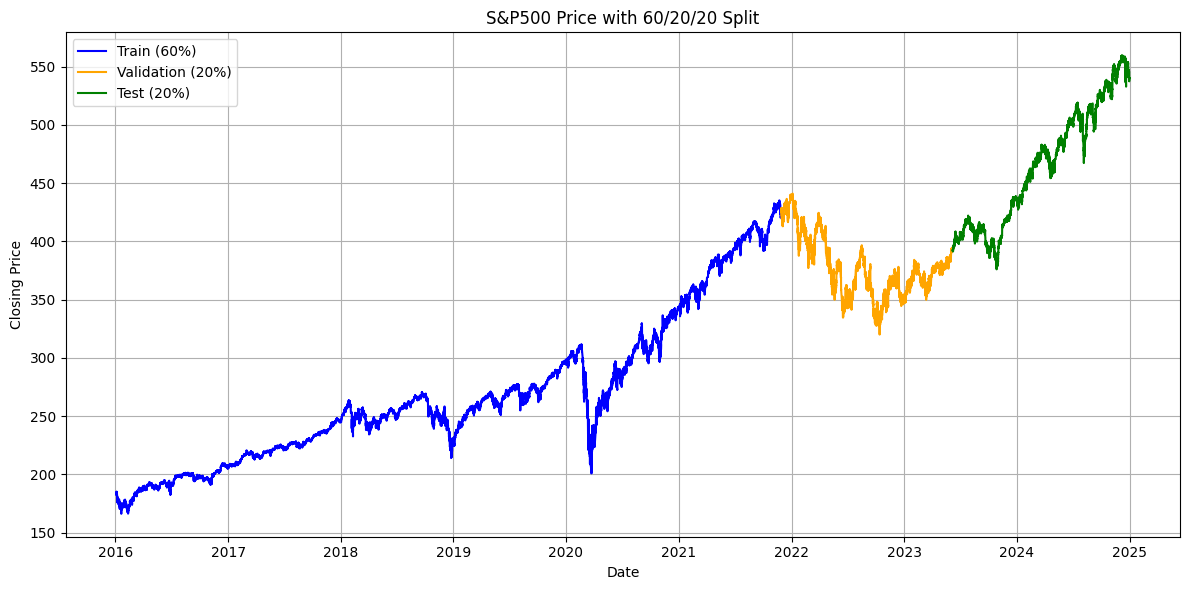

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
# Load CSV data
file_path = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Data/SIP/ds=sip+s=VOO+mp=False+sd=2016-01-1+ed=2024-12-30+tf=5Min.csv'  # Replace with your actual filename
df = pd.read_csv(file_path, parse_dates=['timestamp'])

# Sort by date just in case
df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate split indices
n = len(df)
train_end = int(n * 0.6)
val_end = int(n * 0.8)

# Plot segments
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'][:train_end], df['close'][:train_end], label='Train (60%)', color='blue')
plt.plot(df['timestamp'][train_end:val_end], df['close'][train_end:val_end], label='Validation (20%)', color='orange')
plt.plot(df['timestamp'][val_end:], df['close'][val_end:], label='Test (20%)', color='green')

plt.title('S&P500 Price with 60/20/20 Split')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
print("Test data starts on:", df.loc[val_end, 'timestamp'])


Test data starts on: 2023-06-07 15:50:00+00:00


In [7]:
import pandas as pd
import numpy as np
import os

# Define parameters
tickers = ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'VOO', 'DIA', 'IWM']
start_date = pd.to_datetime('2023-06-07 15:50:00').tz_localize('UTC')
end_date = pd.to_datetime('2024-12-30').tz_localize('UTC')
results = []

for ticker in tickers:
    file_path = f"/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Data/SIP/ds=sip+s={ticker}+mp=False+sd=2016-01-1+ed=2024-12-30+tf=5Min.csv"

    # Load and parse date
    df = pd.read_csv(file_path, parse_dates=['timestamp'])
    df = df.sort_values('timestamp')

    # Filter by date range
    df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)].copy()

    if df.empty:
        print(f"No data in range for {ticker}.")
        continue

    # Calculate log returns
    df['LogReturn'] = np.log(df['close'] / df['close'].shift(1))

    # Daily volatility
    daily_vol = df['LogReturn'].std()

    # Annualized volatility
    annual_vol = daily_vol * np.sqrt(252)

    results.append({
        'Ticker': ticker,
        'Annualized Volatility': round(annual_vol, 4)
    })

# Display results
vol_df = pd.DataFrame(results)
print("\nAnnualized Volatility (2023-06-07 to 2024-12-30):")
print(vol_df.to_string(index=False))


Annualized Volatility (2023-06-07 to 2024-12-30):
Ticker  Annualized Volatility
  NVDA                 0.1268
  AAPL                 0.0166
  MSFT                 0.0187
  AMZN                 0.0208
  GOOG                 0.0215
   VOO                 0.0099
   DIA                 0.0093
   IWM                 0.0142


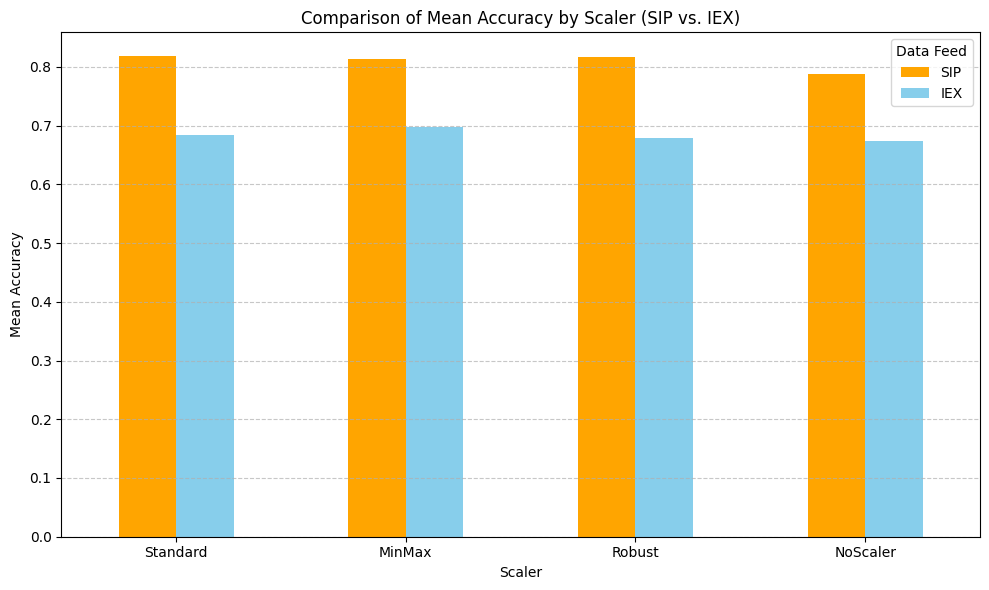

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directories for SIP and IEX data
sip_base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/SIP/'
iex_base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/IEX/'

folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

def load_accuracies(base_dir):
    results = {folder: {} for folder in folders}
    for folder in folders:
        folder_path = os.path.join(base_dir, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):
                params = parse_filename(file)
                if 's' in params and 'ta' in params:
                    ticker = params['s']
                    test_accuracy = round(float(params['ta']), 4)
                    results[folder][ticker] = test_accuracy
    df = pd.DataFrame(results)
    mean_accuracy = df.mean()
    return mean_accuracy

# Load mean accuracies for SIP and IEX
sip_means = load_accuracies(sip_base_dir)
iex_means = load_accuracies(iex_base_dir)

# Combine into a single DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'SIP': sip_means,
    'IEX': iex_means
})

# Plotting comparison
ax = comparison_df.plot.bar(figsize=(10, 6), color=['orange', 'skyblue'])
plt.title('Comparison of Mean Accuracy by Scaler (SIP vs. IEX)')
plt.ylabel('Mean Accuracy')
plt.xlabel('Scaler')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Data Feed')
plt.tight_layout()
plt.show()


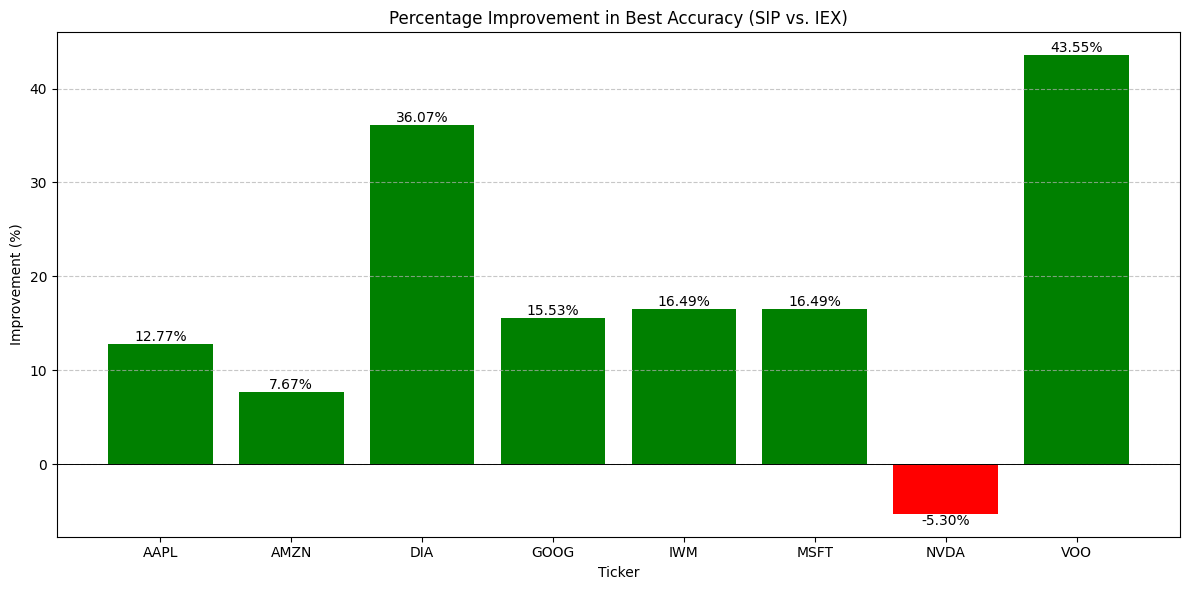

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Base directories for SIP and IEX data
sip_base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/SIP/'
iex_base_dir = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Vasco/Alpaca/Models/IEX/'

folders = ['Standard', 'MinMax', 'Robust', 'NoScaler']

def parse_filename(filename):
    name, _ = os.path.splitext(filename)
    parts = name.split('+')
    params = {}
    for part in parts:
        if '=' in part:
            key, value = part.split('=', 1)
            params[key] = value
    return params

def load_best_accuracy(base_dir):
    results = {}
    for folder in folders:
        folder_path = os.path.join(base_dir, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):
                params = parse_filename(file)
                if 's' in params and 'ta' in params:
                    ticker = params['s']
                    test_accuracy = float(params['ta'])
                    if ticker not in results or results[ticker] < test_accuracy:
                        results[ticker] = test_accuracy
    return results

# Load best accuracies
sip_best = load_best_accuracy(sip_base_dir)
iex_best = load_best_accuracy(iex_base_dir)

# Calculate improvement percentages
tickers, improvements = [], []
for ticker in sorted(sip_best.keys()):
    sip_acc = sip_best[ticker]
    iex_acc = iex_best.get(ticker, None)
    if iex_acc is not None and iex_acc > 0:
        improvement = ((sip_acc - iex_acc) / iex_acc) * 100
        tickers.append(ticker)
        improvements.append(improvement)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(tickers, improvements, color=np.where(np.array(improvements) >= 0, 'green', 'red'))

plt.title('Percentage Improvement in Best Accuracy (SIP vs. IEX)')
plt.ylabel('Improvement (%)')
plt.xlabel('Ticker')

# Annotate bars with exact percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center',
             va='bottom' if yval >= 0 else 'top', fontsize=10)

plt.axhline(0, color='black', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


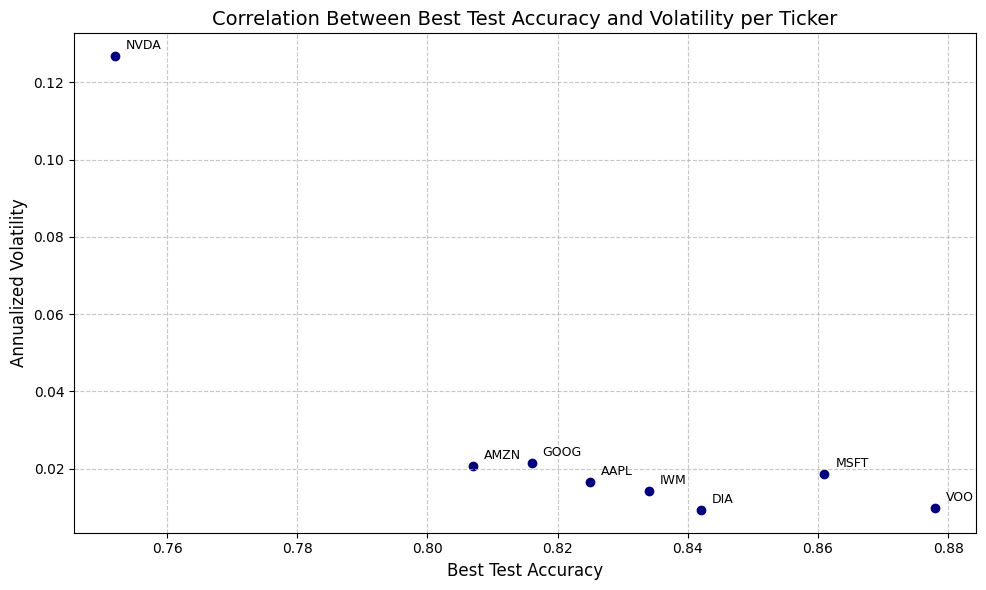

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
tickers = ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'VOO', 'DIA', 'IWM']
volatility = [0.1268, 0.0166, 0.0187, 0.0208, 0.0215,  0.0099,  0.0093, 0.0142]
best_accuracy = [0.7520, 0.8250, 0.8610, 0.8070, 0.8160, 0.8780, 0.8420, 0.8340]

plt.figure(figsize=(10, 6))
plt.scatter(best_accuracy, volatility, color='navy')

# Improved annotations positioning
for i, ticker in enumerate(tickers):
    plt.annotate(ticker,
                 (best_accuracy[i], volatility[i]),
                 textcoords="offset points",
                 xytext=(8,5),
                 ha='left', fontsize=9, color='black')

plt.xlabel('Best Test Accuracy', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.title('Correlation Between Best Test Accuracy and Volatility per Ticker', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


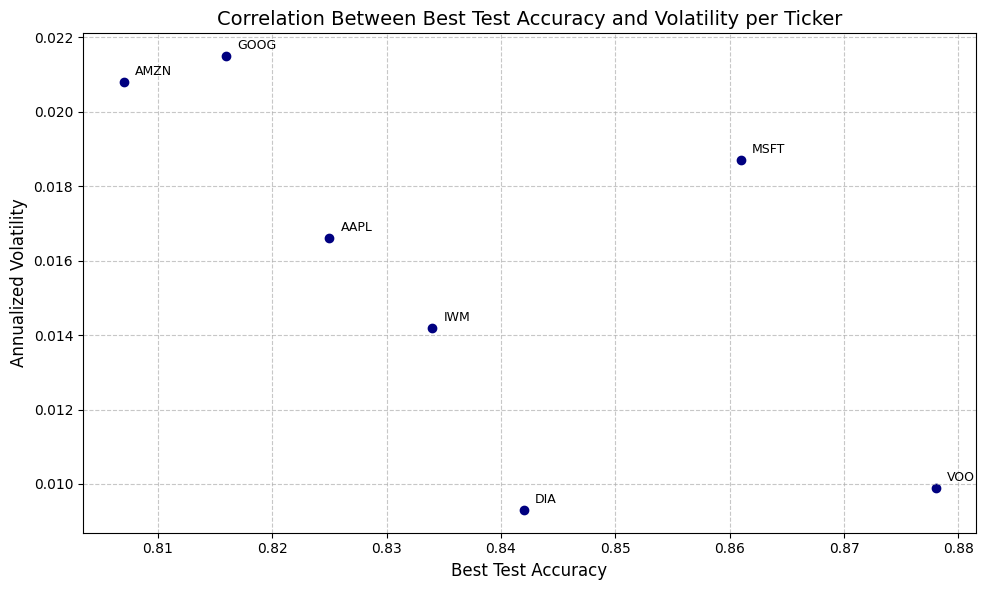

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'VOO', 'DIA', 'IWM']
volatility = [0.0166, 0.0187, 0.0208, 0.0215,  0.0099,  0.0093, 0.0142]
best_accuracy = [0.8250, 0.8610, 0.8070, 0.8160, 0.8780, 0.8420, 0.8340]

plt.figure(figsize=(10, 6))
plt.scatter(best_accuracy, volatility, color='navy')

# Improved annotations positioning
for i, ticker in enumerate(tickers):
    plt.annotate(ticker,
                 (best_accuracy[i], volatility[i]),
                 textcoords="offset points",
                 xytext=(8,5),
                 ha='left', fontsize=9, color='black')

plt.xlabel('Best Test Accuracy', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.title('Correlation Between Best Test Accuracy and Volatility per Ticker', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
